# FACET-II Electron Injector f2e_inj

In [1]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from impact import Impact
from distgen import Generator
import os


gfile = os.path.expandvars('$FACET2_LATTICE/distgen/models/f2e_inj/v0/distgen.yaml')
ifile = os.path.expandvars('$FACET2_LATTICE/impact/models/f2e_inj/v0/ImpactT.yaml')

In [3]:
G = Generator(gfile)
G['n_particle'] = 100000
G['total_charge:value'] = 2000
G.run()
P0 = G.particles

In [4]:
I = Impact.from_yaml(ifile)

I.initial_particles=P0

# Change some things
I.header['Np'] = 100000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 5e-13

# Practical timestep
I['change_timestep_1:dt'] = 4e-12

#I['L0AF_phase:dtheta0_deg'] = -10

#I.ele['QE10425']['zedge'] = 8

#I['QA10361:b1_gradient'] = 1
#I['QA10371:b1_gradient'] = -1
#I['QE10425:b1_gradient'] = 1
#I['QE10441:b1_gradient'] = -1
#I['QE10511:b1_gradient'] = 1
#I['QE10525:b1_gradient'] = -1

# Turn Space Charge off. Both these syntax work
#I.header['Bcurr'] = 0 
#I['header:Bcurr'] = 0 

# Other switches
I.timeout = None

# Switches for MPI
I.use_mpi=True
I.header['Nprow'] = 1
I.header['Npcol'] = 4

I.verbose=True

I.stop = 12.5

# Show repr
#I.command = os.environ['IMPACTT_BIN']
#I.command_mpi = os.environ['IMPACTT_MPI_BIN']

Removed element: stop_1
Set stop to s = 12.5


In [5]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpjn6u_hkp
mpirun -n 4 /Users/chrisonian/Code/miniconda3/envs/devel/bin/ImpactTexe-mpi
writing 100000 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpjn6u_hkp/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 100000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 1.961427436384845e-12 according to initial particles
Cathode start: Replaced Tini with -9.769038439692144e-13 according to initial particles
Setting total charge to 2.000000000000001e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           27          27
 pass setting up lattice...
 che

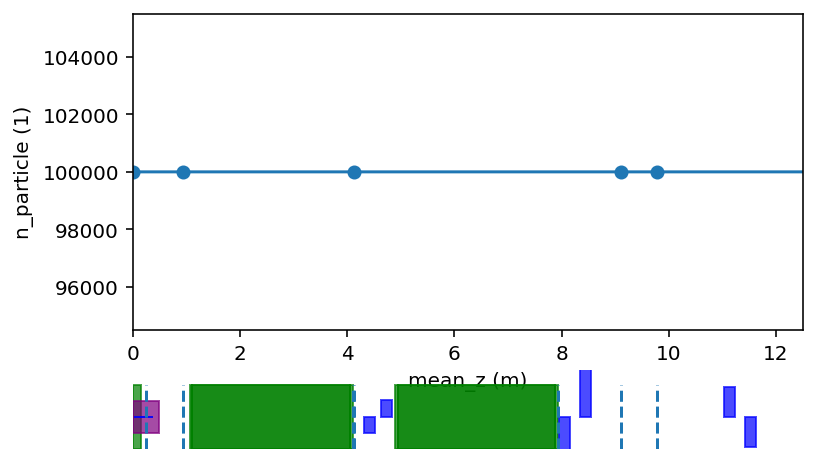

In [14]:
I.plot('n_particle')

In [15]:
5.5/2

2.75

In [16]:
I.particles['final_particles']

<ParticleGroup with 100000 particles at 0x158501bb0>

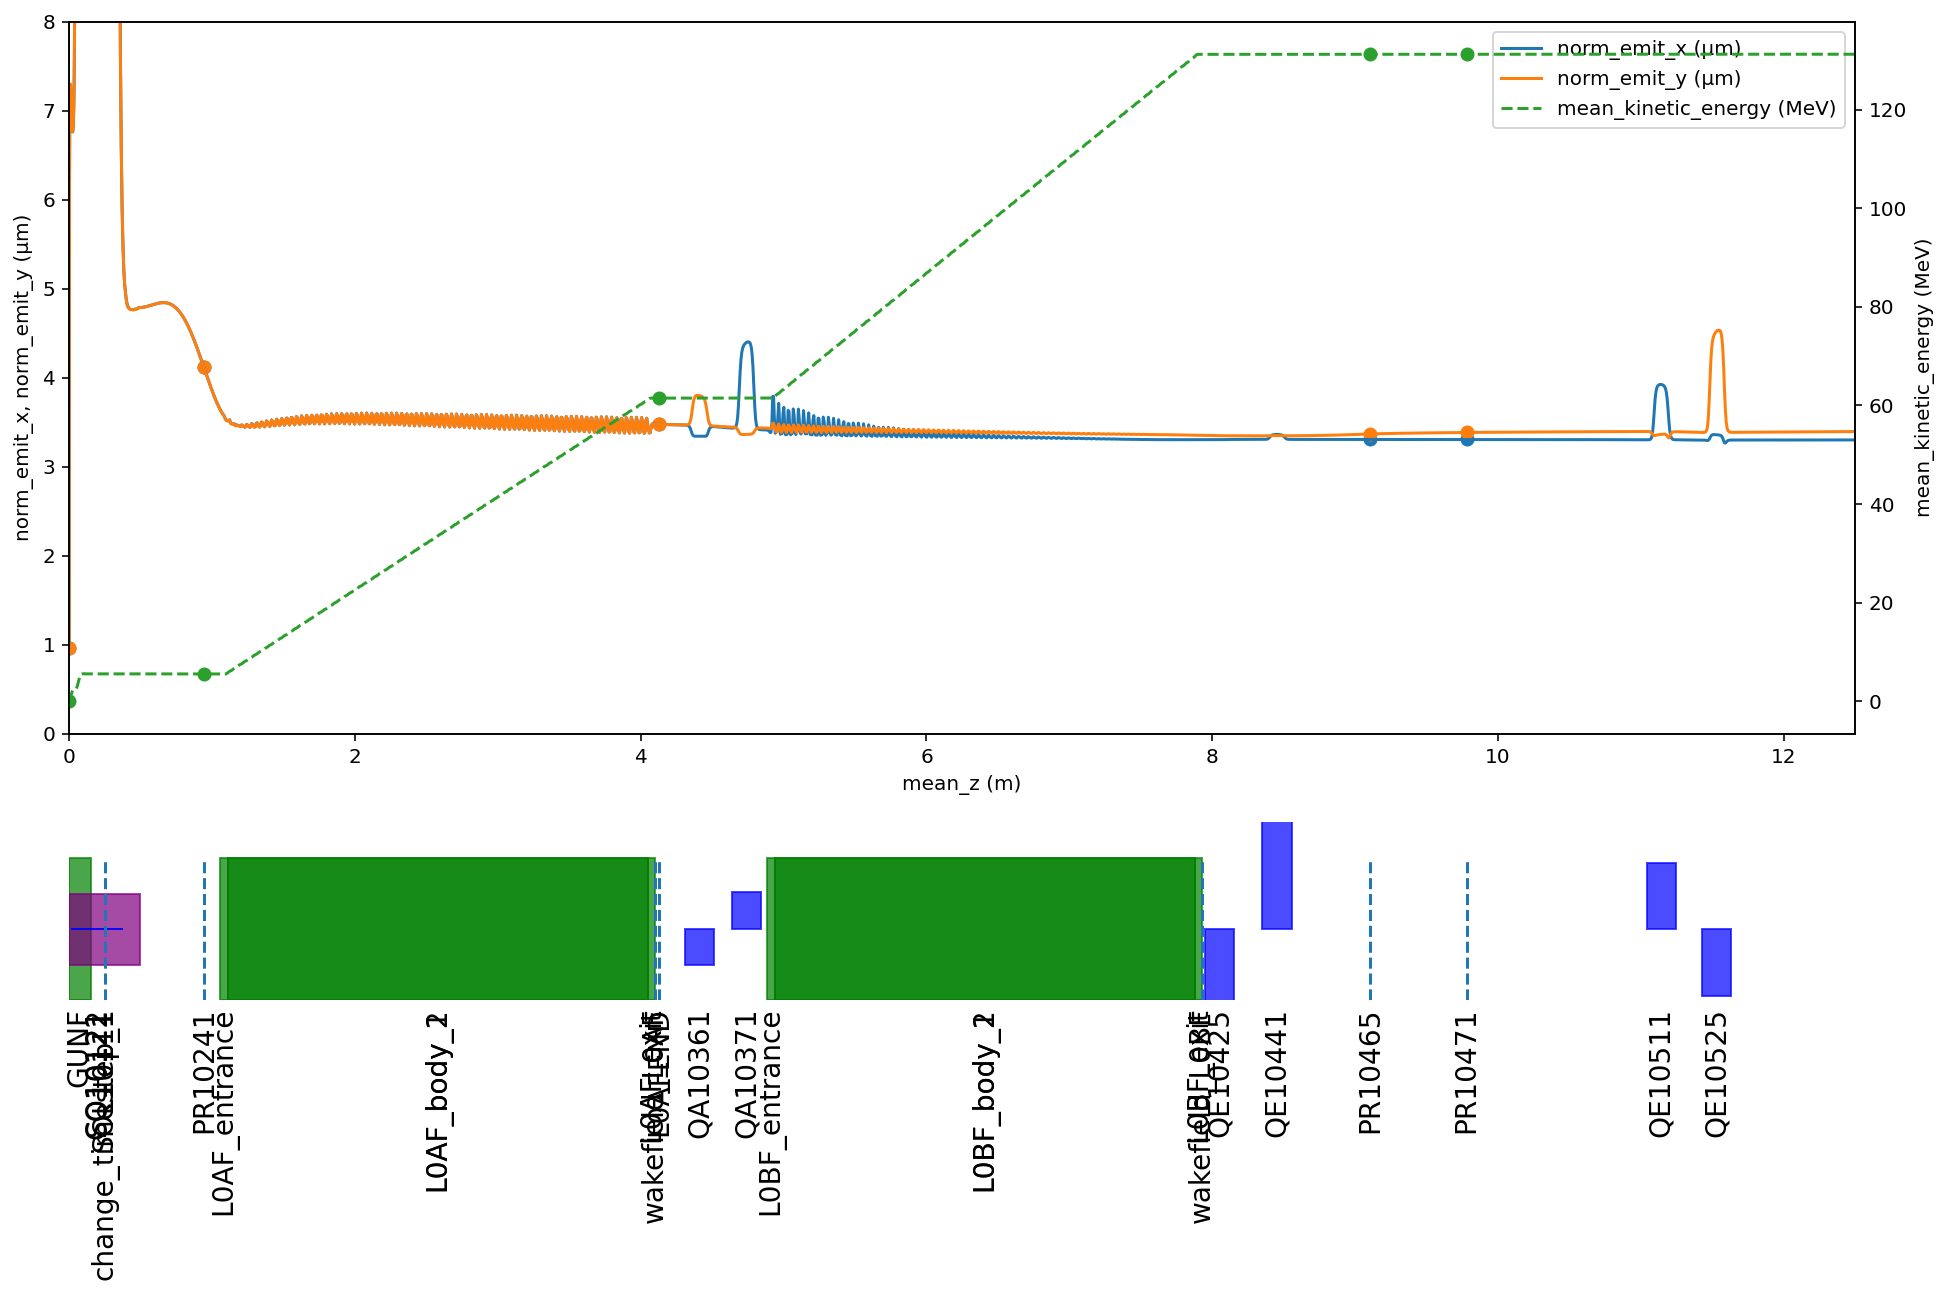

In [17]:
I.plot(['norm_emit_x', 'norm_emit_y'], y2=['mean_kinetic_energy'], figsize=(16,9),
       ylim=(0, 8e-6), include_labels=True)

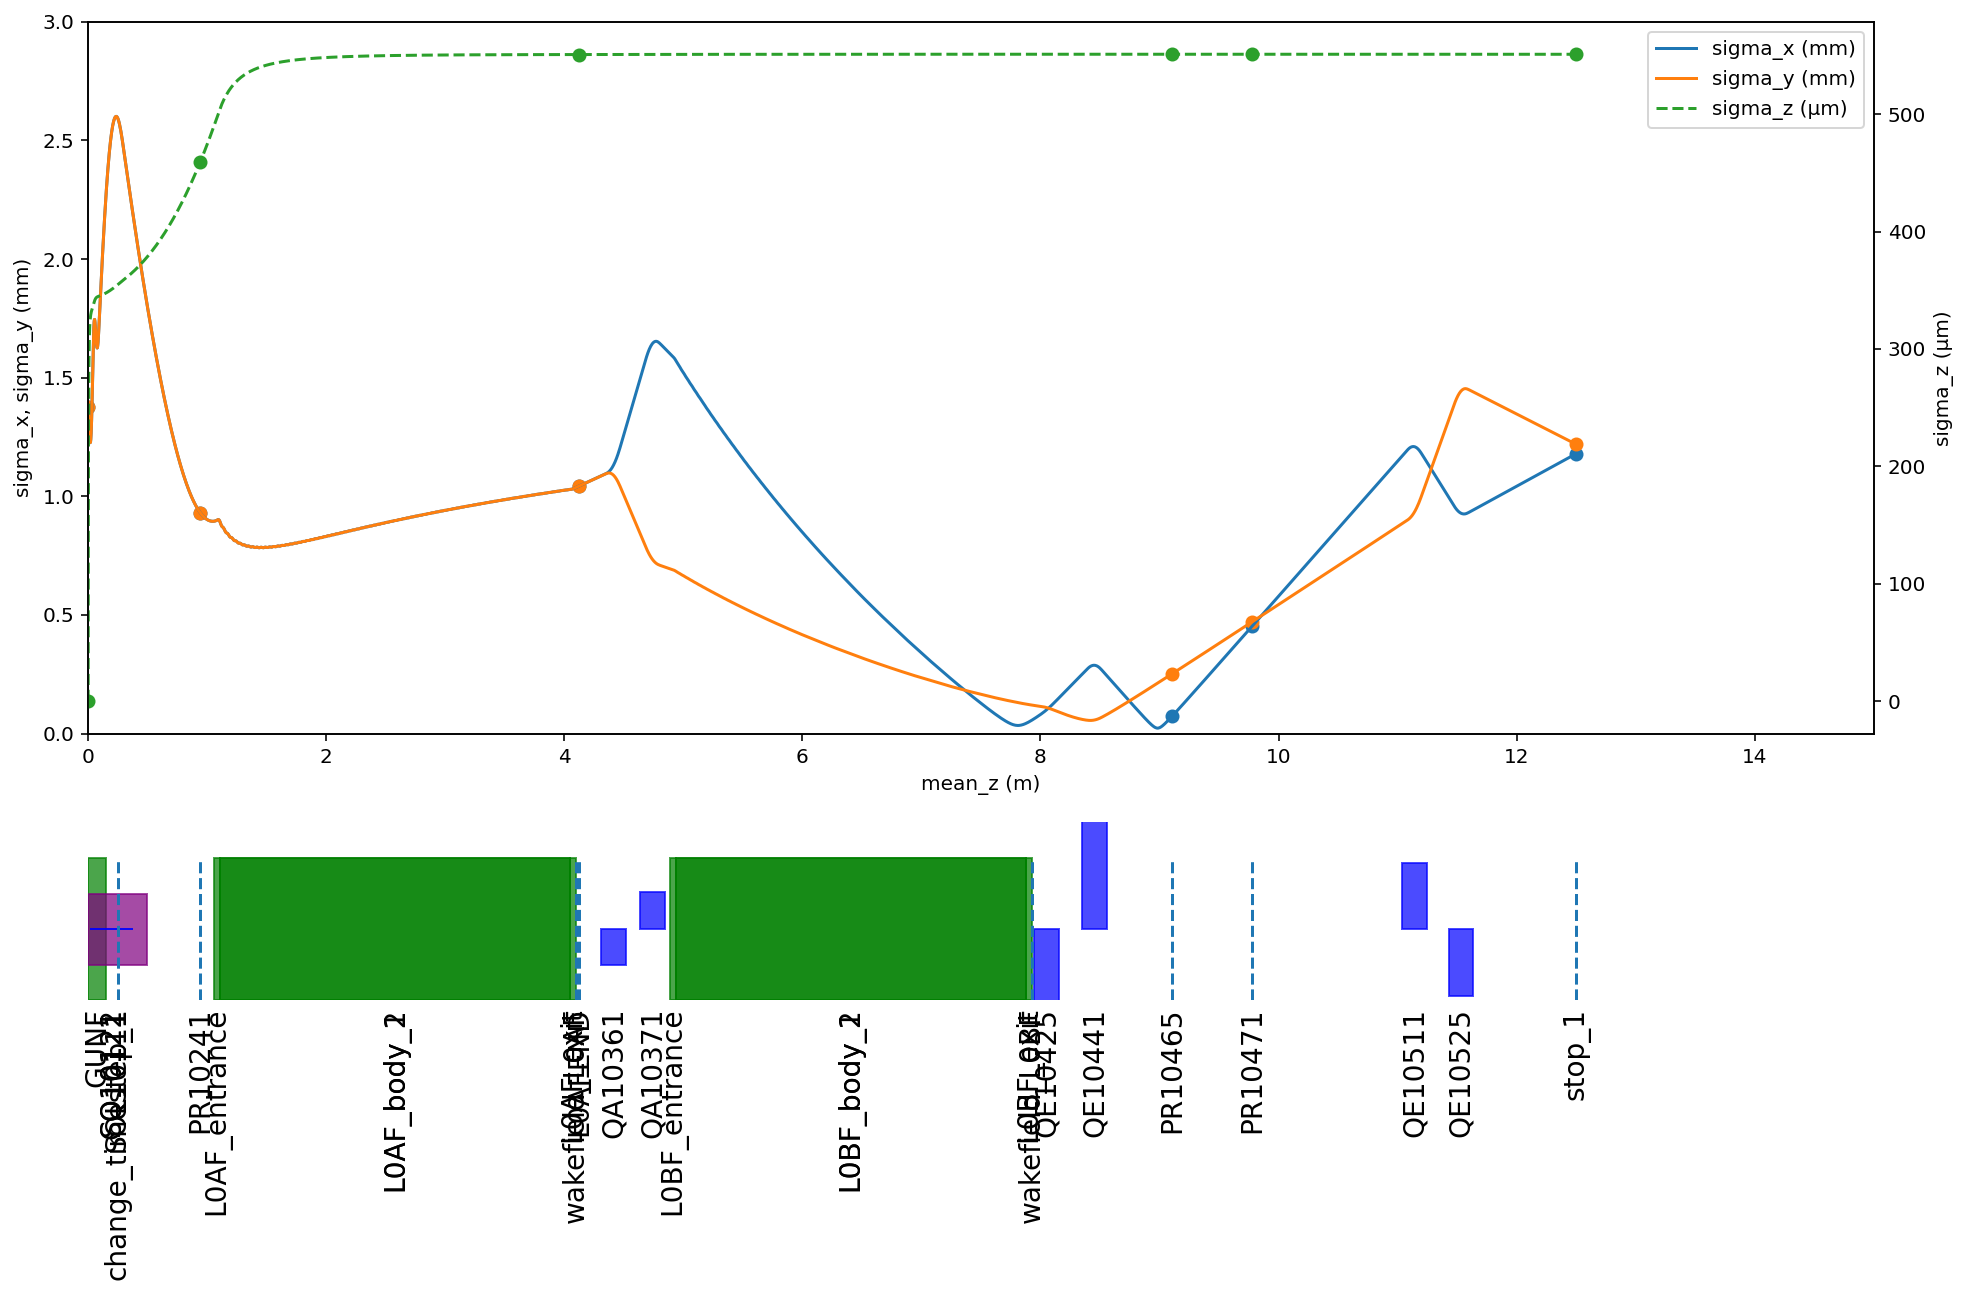

In [18]:
I.plot(['sigma_x', 'sigma_y'], y2='sigma_z', figsize=(16,9), ylim=(0,3e-3), xlim=(0,15), include_labels=True)

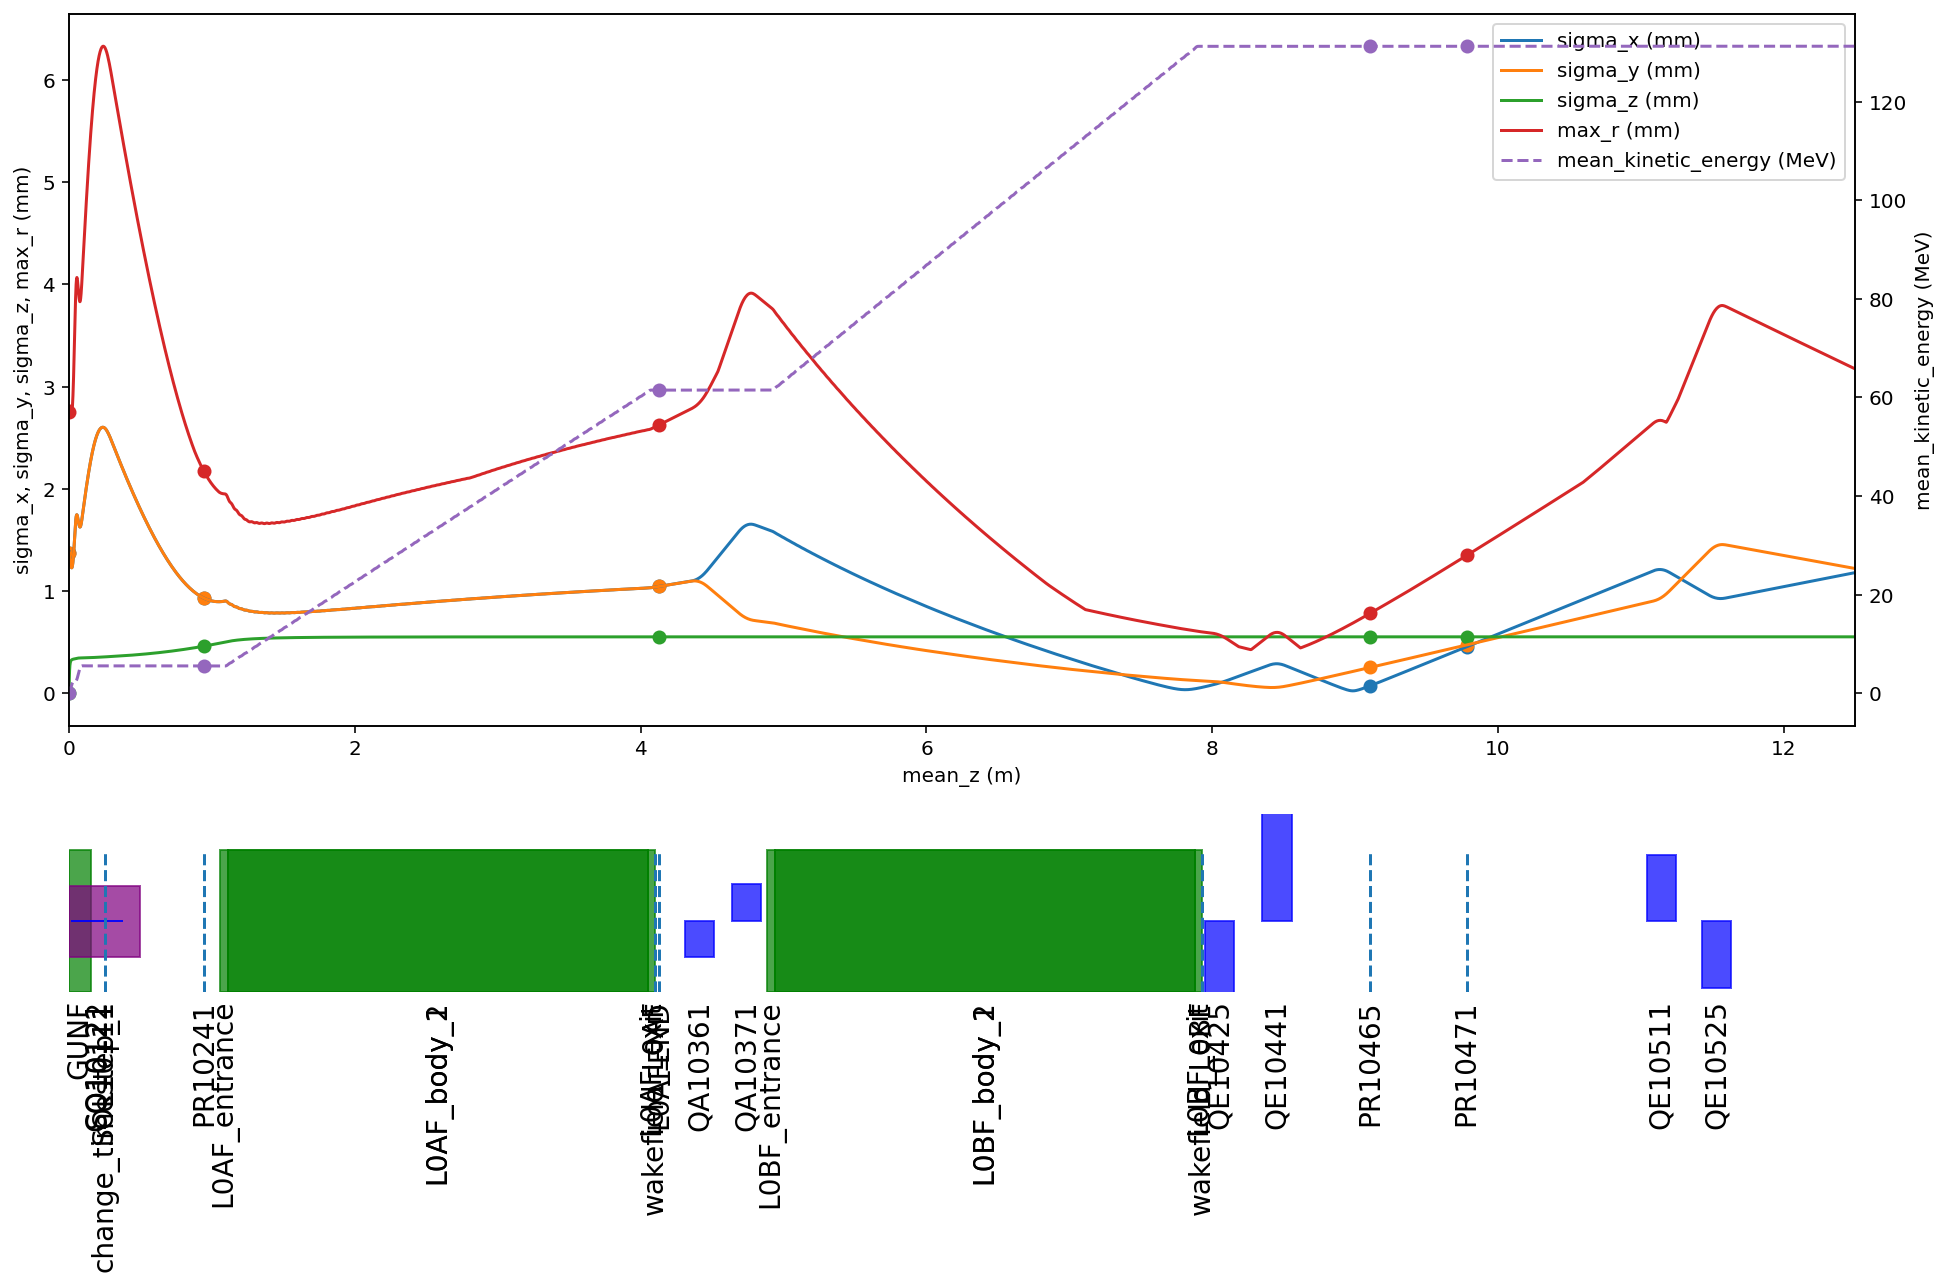

In [19]:
I.plot(['sigma_x', 'sigma_y', 'sigma_z', 'max_r'], y2=['mean_kinetic_energy'],
       figsize=(16,9), include_labels=True)

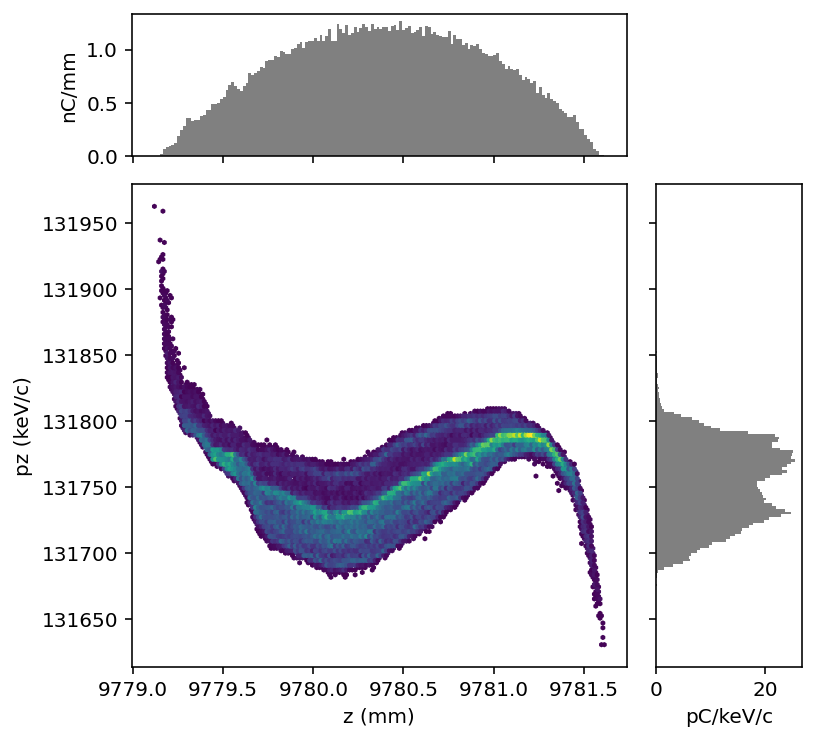

In [20]:
I.particles['PR10471'].plot('z', 'pz', figsize=(6,6))

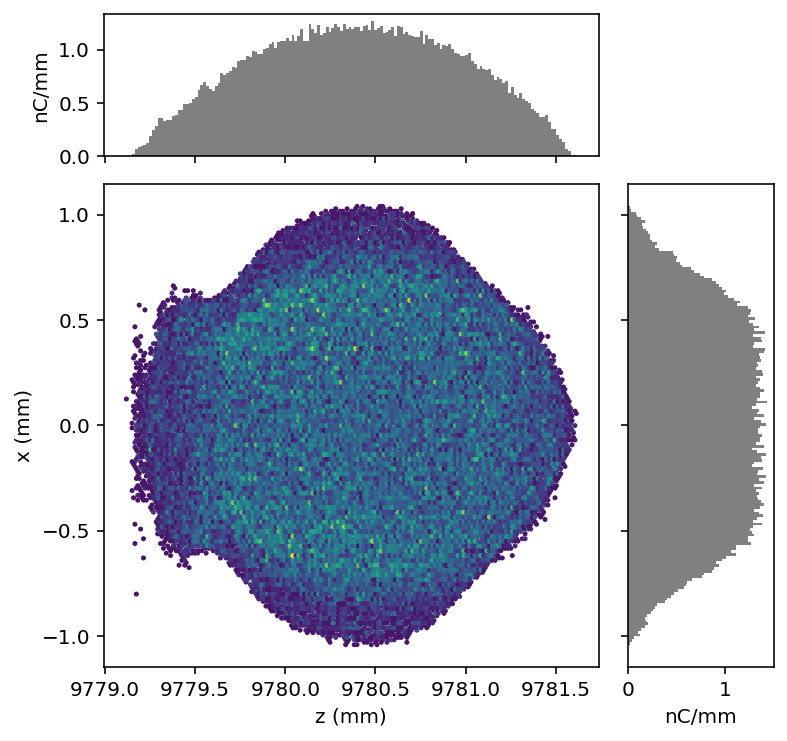

In [22]:
I.particles['PR10471'].plot('z', 'x', figsize=(6,6))